## Handwritten Image Detection with Keras using MNIST and Fashion MNIST data

In this exercise we will work with image data: specifically the famous MNIST and Fashion MNIST data sets.  MNIST data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white). Fashion MNIST data set contains 70,000 images of clothing in grayscale (0=black, 255 = white). All the images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work. <br><br>
We will use a Convolutional Neural Network and compare it with a linear neural network. 

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [8]:
# Preliminaries

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop
from keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [9]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
# What is the corresponding label in the training set?
y_train[333]

8

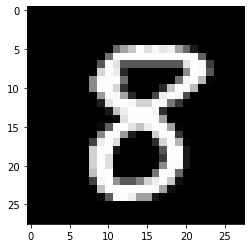

In [13]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [14]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [15]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [16]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [17]:
# We will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

In [18]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

In [20]:
# And now let's fit.

batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 17us/step - loss: 0.5148 - accuracy: 0.8469 - val_loss: 0.2141 - val_accuracy: 0.9365
Epoch 2/30
60000/60000 [==============================] - 1s 15us/step - loss: 0.2537 - accuracy: 0.9255 - val_loss: 0.1523 - val_accuracy: 0.9525
Epoch 3/30
60000/60000 [==============================] - 1s 15us/step - loss: 0.2017 - accuracy: 0.9401 - val_loss: 0.1313 - val_accuracy: 0.9600
Epoch 4/30
60000/60000 [==============================] - 1s 15us/step - loss: 0.1753 - accuracy: 0.9479 - val_loss: 0.1198 - val_accuracy: 0.9626
Epoch 5/30
60000/60000 [==============================] - 1s 15us/step - loss: 0.1558 - accuracy: 0.9530 - val_loss: 0.1056 - val_accuracy: 0.9673
Epoch 6/30
60000/60000 [==============================] - 1s 15us/step - loss: 0.1405 - accuracy: 0.9583 - val_loss: 0.1006 - val_accuracy: 0.9693
Epoch 7/30
60000/60000 [==============================] - 1s 15us/st

In [21]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10469042096354751
Test accuracy: 0.9745000004768372


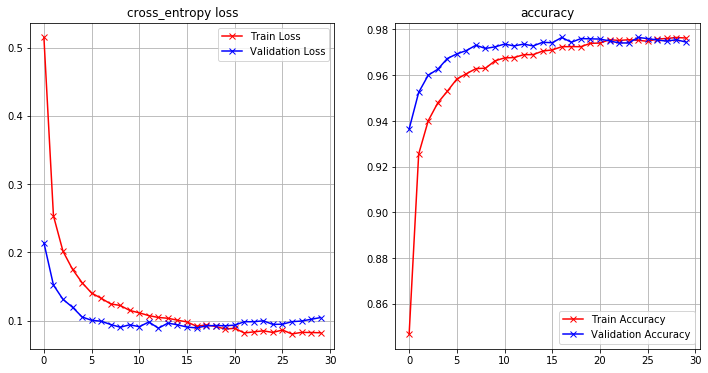

In [22]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

### Keras Layers for CNNs
- Previously we built Neural Networks using primarily the Dense, Activation and Dropout Layers.

- Here we will describe how to use some of the CNN-specific layers provided by Keras

#### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

A few parameters explained:
- `filters`: the number of filter used per location.  In other words, the depth of the output.
- `kernel_size`: an (x,y) tuple giving the height and width of the kernel to be used
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`
- `input_shape`: required only for the first layer

Note, the size of the output will be determined by the kernel_size, strides

#### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: the (x,y) size of the grid to be pooled.
- `strides`: Assumed to be the `pool_size` unless otherwise specified

#### Flatten
Turns its input into a one-dimensional vector (per instance).  Usually used when transitioning between convolutional layers and fully connected layers.


# Exercise
### Build your own CNN model
Use the Keras "Sequential" functionality to build a convolutional neural network `model_2` with the following specifications:
<br>
<br>
Model Architecture:<br>
We will build the famous LeNet-5 architecutre and measure its performance.
<br>
    Convolution -> Relu -> Max pooling -> Convolution -> Relu -> Max pooling -> FC1 -> Relu -> FC2 -> Output(SoftMax)
<br>

1. Convolution1 kernel size: 5(H) x 5(W) x 6(filters), stride = 1, no padding
2. Max pooling1 kernel size: 2(H) x 2(W), stride = 2
3. Convolution2 kernel size: 5(H) x 5(W) x 16(filters), stride = 1, no padding
4. Max pooling2 kernel size: 2(H) x 2(W), stride = 2
5. Fully Connected1 size: 120
6. Fully Connected1 size: 84
7. How many parameters does your model have?  How does it compare with the previous model?
8. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
9. Plot the loss and accuracy graph for training the new model 
10. Evaluate the model on test data

To use the LeNet model, we need to do some preprocessing of the data first.

In [23]:
# Data is currently flattened i.e. m X 784, we need to reshape it back to 28 * 28. To do that we reshape the data.

x_train = np.reshape(x_train, [-1, 28, 28])
x_test = np.reshape(x_test, [-1, 28, 28])
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [24]:
# LeNet requires input of 32 X 32. So, we will pad the train and test images with zeros to increase the size to 32 X 32.

x_train=np.pad(x_train, ((0,0), (2,2), (2, 2)), 'constant')
x_test=np.pad(x_test, ((0,0), (2,2), (2, 2)), 'constant')
x_train.shape, x_test.shape

((60000, 32, 32), (10000, 32, 32))

In [25]:
# Convolutional model requires input to be of 3 dimensions. We will add a channel dimension to it.

x_train = np.reshape(x_train, [-1, 32, 32, 1])
x_test = np.reshape(x_test, [-1, 32, 32, 1])
x_train.shape, x_test.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

Write your model below

In [33]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

model_2 = Sequential()
model_2.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', padding='valid', strides=1, input_shape=(32,32,1)))
model_2.add(MaxPooling2D(2, 2))
model_2.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', padding='valid', strides=1, input_shape=(32,32,1)))
model_2.add(MaxPooling2D(2, 2))
model_2.add(Flatten())
model_2.add(Dense(120, activation='relu'))
model_2.add(Dense(84, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

In [34]:
model_2.summary()
# 61k params, which is a few thousand more than the first model.

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_11 (Dense)             (None, 84)               

In [35]:
learning_rate = .001
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])

In [36]:
batch_size = 128
epochs = 20
history = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.2849 - accuracy: 0.9138 - val_loss: 0.0846 - val_accuracy: 0.9713
Epoch 2/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.0776 - accuracy: 0.9761 - val_loss: 0.0445 - val_accuracy: 0.9858
Epoch 3/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.0538 - accuracy: 0.9835 - val_loss: 0.0478 - val_accuracy: 0.9849
Epoch 4/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.0401 - accuracy: 0.9877 - val_loss: 0.0380 - val_accuracy: 0.9883
Epoch 5/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.0512 - val_accuracy: 0.9844
Epoch 6/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.0275 - accuracy: 0.9910 - val_loss: 0.0307 - val_accuracy: 0.9900
Epoch 7/20
60000/60000 [==============================] - 8s 1

In [37]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05325029872586731
Test accuracy: 0.9908999800682068


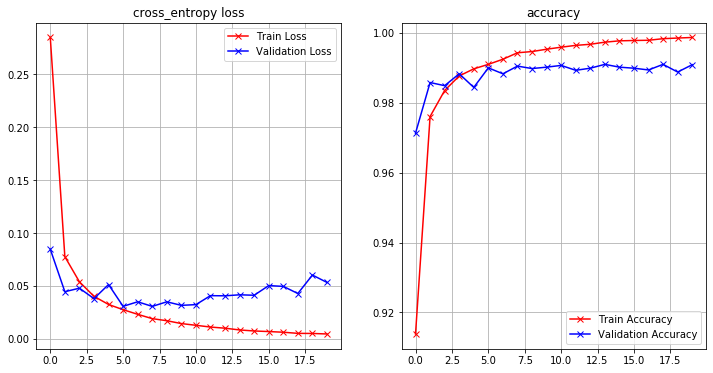

In [39]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

## Think about the following questions

1) How do model_1 and model_2 compare?  Which do you prefer?  If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model?  How do they compare?  What does that suggest about each model?  Do the same for accuracy?  Which do you think is more meaningful, the loss or the accuracy?

In [40]:
# Model 2 performed significantly better in many catagories. 
# The most obvious, accuracy, reached just shy of 98% in Model 1, while Model 2 reached a validation accuracy of over 99%
# While there was a larger gap between training and validation accuracy in Model 2, which could indicate overfitting in some
# cases, the testing performance had a large enough advantage over Model 1 to reasonably assume that it is generally better.
# Additionally, the validation loss was much smaller in the second Model, indicating closer guesses despite mild overfitting
# in the last few epochs.
# I would choose model 2 to put into production due to the raw accuracy increase; the difference between 98% and 99% is massive
# given the context.

In [ ]:
# The trajectory of both validation loss functions increased near the end of the training period, 
# indicating that some overfitting likely occured in these runs. The increase is more pronounced and has a wider gap from the 
# training loss in Model 2, as well as the increase starting earlier in the run. This means that Model 2 is likely
# overfitted to the data set. The validation accuracy of the second model, however, stayed near its peak for all 20 epochs, 
# while the first Model's trajectory decreased near the end, which indicates overfitting as well. In this case, where the
# recognition is either correct or useless, accuracy is more meaningful than loss. It doesn't matter if the Model gets close,
# 99% is better than 98% by a lot.


# Fashion MNIST
We will do the similar things for Fashion MNIST dataset. Fashion MNIST has 10 categories of clothing items:<br>

| Label | Description | 
| --- | --- | 
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [41]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 25s 6us/step


In [42]:
x_train[0].shape

(28, 28)

In [43]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
         42,  92,  71, 107,  33,   0,   3,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  23,
        145,   0,   0,   0, 113,  20,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89,
          8,   0,  10,   0,  36, 104,   0,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  37,  97,
          0,   5,   1,   0,   0, 141,  23,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,  70,  75,
          0,   6,   1,   0,   0, 141,  56,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  85,  57,
          0,   5,   1,   1,   0, 126,  62,   0,   6,   0,   0,   0,   0,
          0,   0],
       [  

In [44]:
# What is the corresponding label in the training set?
y_train[333]

8

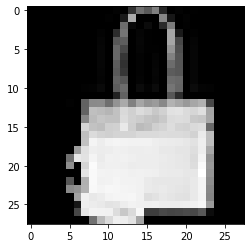

In [45]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [46]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [47]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255

In [48]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

## Reperforming the earlier preprocessing methods

In [49]:
# Data is currently flattened i.e. m X 784, we need to reshape it back to 28 * 28. To do that we reshape the data.

x_train = np.reshape(x_train, [-1, 28, 28])
x_test = np.reshape(x_test, [-1, 28, 28])
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [50]:
# LeNet requires input of 32 X 32. So, we will pad the train and test images with zeros to increase the size to 32 X 32.

x_train=np.pad(x_train, ((0,0), (2,2), (2, 2)), 'constant')
x_test=np.pad(x_test, ((0,0), (2,2), (2, 2)), 'constant')
x_train.shape, x_test.shape

((60000, 32, 32), (10000, 32, 32))

In [51]:
# Convolutional model requires input to be of 3 dimensions. We will add a channel dimension to it.

x_train = np.reshape(x_train, [-1, 32, 32, 1])
x_test = np.reshape(x_test, [-1, 32, 32, 1])
x_train.shape, x_test.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

Build a similar convolutional model with a differnet structure, learning rate or number of epochs, etc. that you think will result in a good model for this dataset.

In [52]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

model_2 = Sequential()
model_2.add(Conv2D(filters=8, kernel_size=(5, 5), activation='relu', padding='valid', strides=1, input_shape=(32,32,1)))
model_2.add(MaxPooling2D(2, 2))
model_2.add(Conv2D(filters=10, kernel_size=(5, 5), activation='relu', padding='valid', strides=1, input_shape=(32,32,1)))
model_2.add(MaxPooling2D(2, 2))
model_2.add(Flatten())
model_2.add(Dense(120, activation='relu'))
model_2.add(Dense(84, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

In [53]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 10)        2010      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 250)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 120)               30120     
_________________________________________________________________
dense_14 (Dense)             (None, 84)               

In [54]:

learning_rate = .001
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])

In [55]:
batch_size = 128
epochs = 15
history = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 9s 157us/step - loss: 0.6406 - accuracy: 0.7602 - val_loss: 0.4720 - val_accuracy: 0.8353
Epoch 2/15
60000/60000 [==============================] - 9s 156us/step - loss: 0.4087 - accuracy: 0.8512 - val_loss: 0.4048 - val_accuracy: 0.8497
Epoch 3/15
60000/60000 [==============================] - 9s 154us/step - loss: 0.3512 - accuracy: 0.8706 - val_loss: 0.3704 - val_accuracy: 0.8645
Epoch 4/15
60000/60000 [==============================] - 9s 156us/step - loss: 0.3202 - accuracy: 0.8815 - val_loss: 0.3452 - val_accuracy: 0.8765
Epoch 5/15
60000/60000 [==============================] - 9s 158us/step - loss: 0.2978 - accuracy: 0.8885 - val_loss: 0.3283 - val_accuracy: 0.8835
Epoch 6/15
60000/60000 [==============================] - 10s 160us/step - loss: 0.2790 - accuracy: 0.8971 - val_loss: 0.3334 - val_accuracy: 0.8762
Epoch 7/15
60000/60000 [==============================] - 9s 

In [56]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3007431816458702
Test accuracy: 0.9017999768257141


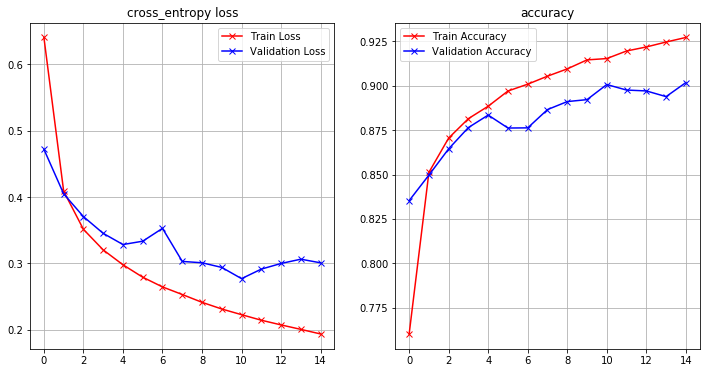

In [57]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)